In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift

In [2]:
N = 1000
m = 0.5
Λ = 1/10                                                     # Parámetro adimensional λ/L
χ = np.linspace(-10, 10, N)                                  # Distancia adimensional x/L
Δχ = χ[1]-χ[0]                                               # Espaciamiento en el espacio real
ζ = np.linspace(0, 25, N)                                    # Distancia adimensional z/L
X, Z = np.meshgrid(χ, ζ)
Ia = abs(1+m*np.exp(-1j*np.pi*Λ*Z)*np.cos(2*np.pi*X))**2/4   # Intensidad analítica en el plano XZ

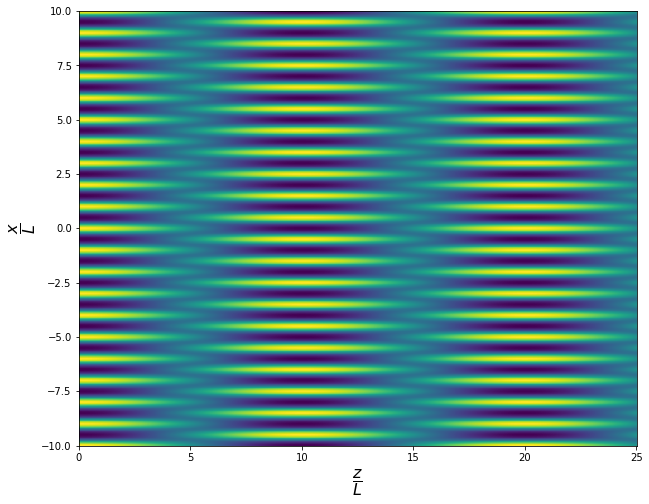

In [3]:
plt.figure(figsize=(10,8))
plt.pcolormesh(Z, X, Ia, shading='auto')
plt.xlabel(r'$\dfrac{z}{L}$', fontsize=16)
plt.ylabel(r'$\dfrac{x}{L}$', fontsize=16)
plt.show()

In [4]:
t = (1+m*np.cos(2*np.pi*χ))/2                # Transmitancia
fftt = fft(t)
fx = fftfreq(N, Δχ)
Hf = []
for z in ζ:
    Hf.append(np.exp(-1j*np.pi*Λ*z*fx**2))   # Función de transferencia en z dado
In = []
for i in range(len(ζ)):
    In.append(abs(ifft(fftt*Hf[i]))**2)      # Intensidad numérica en el plano XZ

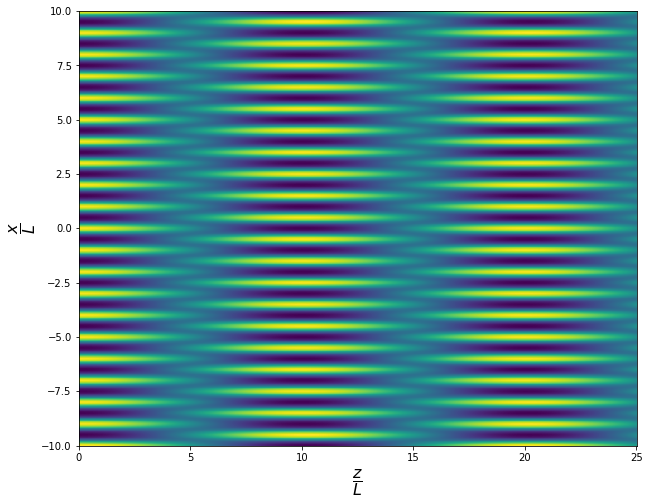

In [5]:
plt.figure(figsize=(10,8))
plt.pcolormesh(Z, X, In, shading='auto')
plt.xlabel(r'$\dfrac{z}{L}$', fontsize=16)
plt.ylabel(r'$\dfrac{x}{L}$', fontsize=16)
plt.show()

In [6]:
N = 3000
m = 1      # Parámetro adimensional λ/L

In [7]:
χ = np.linspace(-300, 300, N)                # Distancia adimensional x/L
Δχ = χ[1]-χ[0]                               # Espaciamiento en el espacio real
ζ = np.linspace(2000, 2025, N)               # Distancia adimensional z/L
X, Z = np.meshgrid(χ, ζ)

g = (1+m*np.cos(2*np.pi*χ))/2                # Rejilla infinita
rect = abs(χ) < 10
t = g*rect                                   # Transmitancia de rejilla finita de ancho 20
fftt = fft(t)
fx = fftfreq(N, Δχ)
Hf = []
for z in ζ:
    Hf.append(np.exp(-1j*np.pi*Λ*z*fx**2))   # Función de transferencia en z dado
If = []
for i in range(len(ζ)):
    If.append(abs(ifft(fftt*Hf[i]))**2)      # Intensidad numérica en el plano XZ

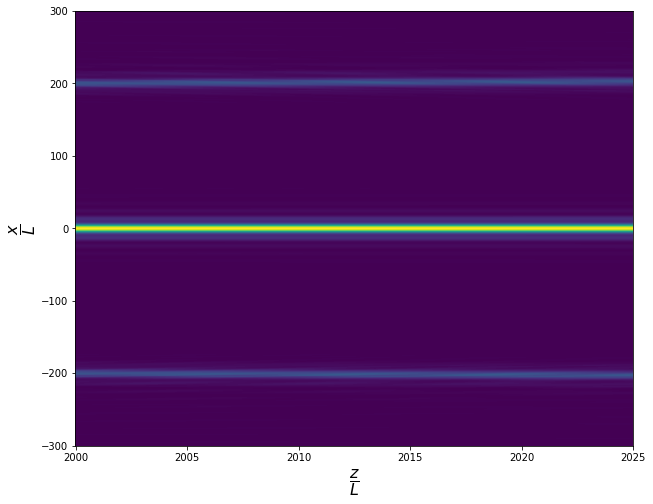

In [8]:
plt.figure(figsize=(10,8))
plt.pcolormesh(Z, X, If, shading='auto')
plt.xlabel(r'$\dfrac{z}{L}$', fontsize=16)
plt.ylabel(r'$\dfrac{x}{L}$', fontsize=16)
plt.show()

In [9]:
χ = np.linspace(-300, 300, N)                # Distancia adimensional x/L
Δχ = χ[1]-χ[0]                               # Espaciamiento en el espacio real
n = 1000
ζ1 = np.linspace(0, 10, n)
ζ2 = np.linspace(10, 2000, N)
ζ = np.concatenate([ζ1, ζ2])                 # Distancia adimensional z/L
X, Z = np.meshgrid(χ, ζ)

g = (1+m*np.cos(2*np.pi*χ))/2                # Rejilla infinita
rect = abs(χ) < 10
t = g*rect                                   # Transmitancia de rejilla finita de ancho 20
fftt = fft(t)
fx = fftfreq(N, Δχ)
Hf = []
for z in ζ:
    Hf.append(np.exp(-1j*np.pi*Λ*z*fx**2))   # Función de transferencia en z dado
I = []
for i in range(len(ζ)):
    I.append(abs(ifft(fftt*Hf[i]))**2)       # Intensidad numérica en el plano XZ
I = np.array(I)

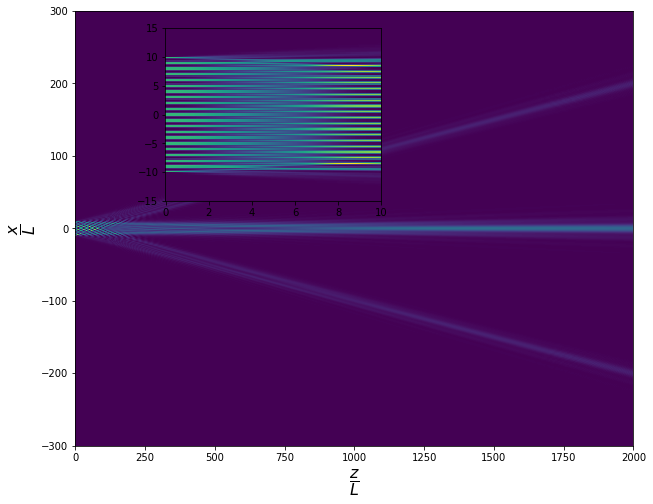

In [10]:
fig, ax1 = plt.subplots(figsize=(10,8))

left, bottom, width, height = [0.25, 0.55, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.pcolormesh(Z, X, I, shading='auto')
ax2.pcolormesh(Z[0:n,1425:1575], X[0:n,1425:1575], I[0:n,1425:1575], shading='auto')
ax1.set_xlabel(r'$\dfrac{z}{L}$', fontsize=16)
ax1.set_ylabel(r'$\dfrac{x}{L}$', fontsize=16)
plt.show()